In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

初始采样

In [84]:
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter
sample_size = 100
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 计算每边的点数（近似平方根）
points_per_side = sample_size

# 在指定范围内生成均匀分布的点
x_values = np.linspace(x_range[0], x_range[1], points_per_side)
y_values = np.linspace(y_range[0], y_range[1], points_per_side)

# 对每个点进行迭代计算
results = []
for x in x_values:
    for y in y_values:
        c = complex(x, y)
        iteration = mandelbrot(c, max_iter)
        results.append((x, y, iteration))
print(len(results))

10000


构建网格

In [86]:
# 定义结构化数据类型来存储每个点的x范围，y范围和迭代次数
dtype = [('x_range', float, (2,)), ('y_range', float, (2,)), ('iteration', int)]

# 创建一个结构化数组来存储这些值
structured_grid = np.zeros((points_per_side, points_per_side), dtype=dtype)

# 计算每个点的x和y范围以及迭代次数
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        c = complex(x, y)
        iteration = mandelbrot(c, max_iter)

        # 计算x和y的范围
        x_range = [x_values[0] + (i/points_per_side) * (x_values[-1] - x_values[0]), 
                   x_values[0] + ((i+1)/points_per_side) * (x_values[-1] - x_values[0])]
        y_range = [y_values[0] + (j/points_per_side) * (y_values[-1] - y_values[0]), 
                   y_values[0] + ((j+1)/points_per_side) * (y_values[-1] - y_values[0])]

        # 将这些值存储在结构化数组中
        structured_grid[j, i] = (x_range, y_range, iteration)





#可视化

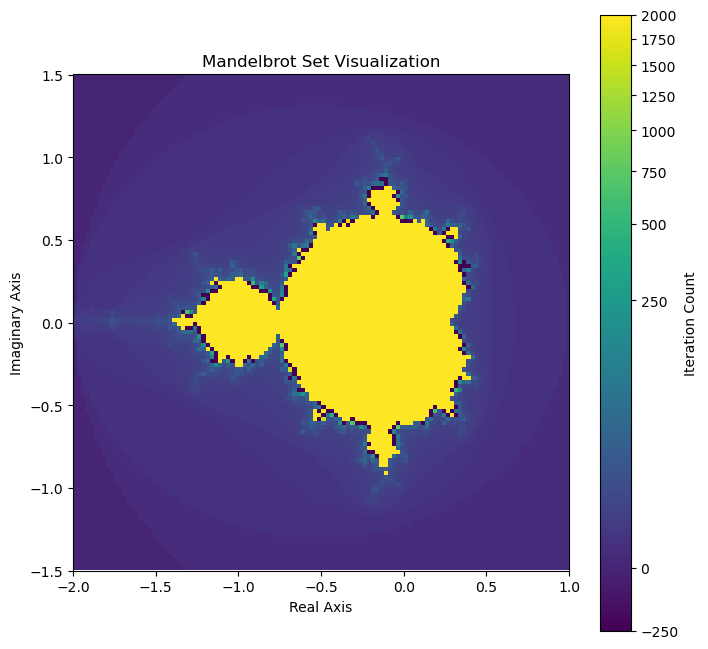

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 提取迭代次数数据用于绘图
iteration_data = structured_grid['iteration']

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=iteration_data.min(), vmax=iteration_data.max())

# 绘制曼德布洛特集
plt.figure(figsize=(8, 8))
iteration_data = structured_grid['iteration']
plt.imshow(iteration_data, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Mandelbrot Set Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


获得boundary_grid_list（不带最近的2000点）

In [77]:
boundary_grid_list = []

# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
for i in range(points_per_side):
    for j in range(points_per_side):
        if 10 <= structured_grid['iteration'][j, i] < 2000:
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
print(len(points_to_check))
for point, x_index, y_index in points_to_check:
    boundary_grid_list.append(point)  # 加入初始点


# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
print(len(points_to_check))
# 检查boundary_grid的一部分内容
print(boundary_grid[:10])  # 展示前10个元素以示例


548
548
[([-1.79, -1.76], [-0.03,  0.  ], 11) ([-1.79, -1.76], [ 0.  ,  0.03], 11)
 ([-1.64, -1.61], [-0.03,  0.  ], 10) ([-1.64, -1.61], [ 0.  ,  0.03], 10)
 ([-1.58, -1.55], [-0.03,  0.  ], 13) ([-1.58, -1.55], [ 0.  ,  0.03], 13)
 ([-1.52, -1.49], [-0.03,  0.  ], 10) ([-1.52, -1.49], [ 0.  ,  0.03], 10)
 ([-1.49, -1.46], [-0.06, -0.03], 11) ([-1.49, -1.46], [-0.03,  0.  ], 14)]


boundary_grid_list带最近的2000点

In [49]:
boundary_grid_list = []

# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
for i in range(points_per_side):
    for j in range(points_per_side):
        if init_threshold <= structured_grid['iteration'][j, i] < 2000:
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
print(len(points_to_check))

for point, x_index, y_index in points_to_check:
    # 加入初始点，如果它尚未存在于列表中
    boundary_grid_list.append(point)

    # 检查四个相邻的网格点并添加它们，如果它们尚未存在于列表中#存在重复添加也没事
    if x_index > 0:
        left_neighbor = structured_grid[y_index, x_index - 1]
        if left_neighbor['iteration'] == 2000:
            boundary_grid_list.append(left_neighbor)
            structured_grid[y_index, x_index - 1]['iteration'] = 0

    if x_index < points_per_side - 1:
        right_neighbor = structured_grid[y_index, x_index + 1]
        if right_neighbor['iteration'] == 2000:
            boundary_grid_list.append(right_neighbor)
            structured_grid[y_index, x_index + 1]['iteration'] = 0
    if y_index > 0:
        top_neighbor = structured_grid[y_index - 1, x_index]
        if top_neighbor['iteration'] == 2000:
            boundary_grid_list.append(top_neighbor)
            structured_grid[y_index - 1, x_index]['iteration'] = 0
    if y_index < points_per_side - 1:
        bottom_neighbor = structured_grid[y_index + 1, x_index]
        if bottom_neighbor['iteration'] == 2000:
            boundary_grid_list.append(bottom_neighbor)
            structured_grid[y_index + 1, x_index]['iteration'] = 0

# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
print(len(boundary_grid))

in_area -= (len(boundary_grid) - len(points_to_check)) / sample_size / sample_size * 9
bound_area += (len(boundary_grid) - len(points_to_check)) / sample_size / sample_size * 9

print(in_area)
print(bound_area)
# 检查boundary_grid的一部分内容



97
242
1.3974999999999997
0.15125
[([-1.325, -1.3  ], [-0.075, -0.05 ], 654)
 ([-1.35 , -1.325], [-0.075, -0.05 ],   0)
 ([-1.325, -1.3  ], [-0.05 , -0.025],   0)
 ([-1.325, -1.3  ], [ 0.05 ,  0.075],  65)
 ([-1.325, -1.3  ], [ 0.025,  0.05 ],   0)
 ([-1.3  , -1.275], [-0.075, -0.05 ], 214)
 ([-1.3  , -1.275], [-0.05 , -0.025],   0)
 ([-1.3  , -1.275], [ 0.05 ,  0.075],  61)
 ([-1.3  , -1.275], [ 0.025,  0.05 ],   0)
 ([-1.275, -1.25 ], [ 0.025,  0.05 ],  77)]


对于boundary_grid_list中的网格进行模拟，控制总模拟数不超过1万次

In [80]:
import math

# 定义总模拟次数上限
total_max_simulations = 10000

# 计算每个网格的最大模拟次数
num_points = len(boundary_grid_list)
max_simulations_per_point = total_max_simulations // num_points

# 找到不大于max_simulations_per_point的最大平方数
square_root = int(math.sqrt(max_simulations_per_point))
max_simulations_per_point_square = square_root ** 2
# 对每个网格点进行均匀划分和模拟
simulation_results_structured = []
for point in boundary_grid_list:
    x_start, x_end = point['x_range']
    y_start, y_end = point['y_range']

    # 计算x和y的步长
    x_step = (x_end - x_start) / square_root
    y_step = (y_end - y_start) / square_root

    # 在每个小区域内进行模拟
    for i in range(square_root):
        for j in range(square_root):
            x = x_start + i * x_step
            y = y_start + j * y_step
            c = complex(x + x_step / 2, y + y_step / 2)  # 小区域的中心点
            iteration = mandelbrot(c, max_iter)
            x_range_small = [x, x + x_step]
            y_range_small = [y, y + y_step]
            simulation_results_structured.append((x_range_small, y_range_small, iteration))

# 转换为numpy数组
simulation_results_array = np.array(simulation_results_structured, dtype=structured_grid.dtype)

# 输出模拟结果的一部分
print(simulation_results_array[:10])  # 展示前10个模拟结果


[([-1.79  , -1.7825], [-0.03  , -0.0225],  7)
 ([-1.79  , -1.7825], [-0.0225, -0.015 ], 16)
 ([-1.79  , -1.7825], [-0.015 , -0.0075], 11)
 ([-1.79  , -1.7825], [-0.0075,  0.    ], 16)
 ([-1.7825, -1.775 ], [-0.03  , -0.0225],  9)
 ([-1.7825, -1.775 ], [-0.0225, -0.015 ], 11)
 ([-1.7825, -1.775 ], [-0.015 , -0.0075], 15)
 ([-1.7825, -1.775 ], [-0.0075,  0.    ], 26)
 ([-1.775 , -1.7675], [-0.03  , -0.0225],  9)
 ([-1.775 , -1.7675], [-0.0225, -0.015 ], 13)]


#可视化

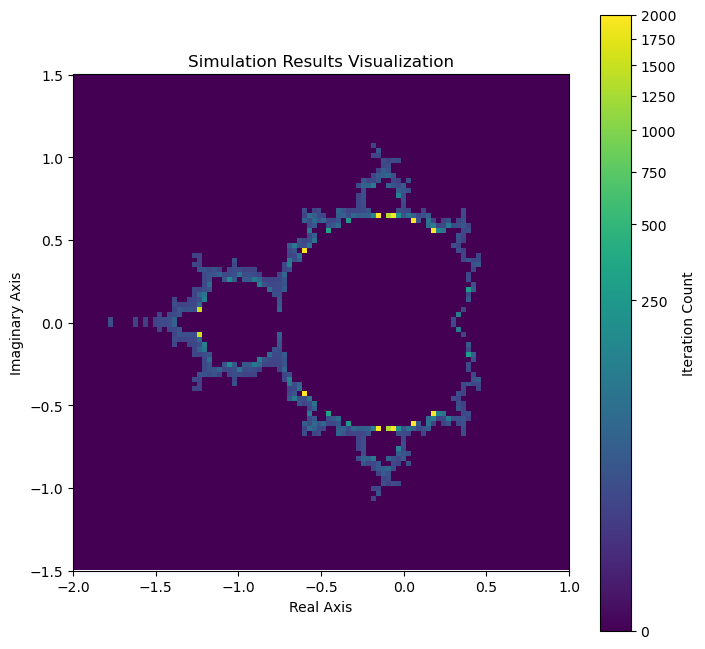

In [81]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建一个与初始网格大小相同的图像
visualization_grid = np.zeros((points_per_side, points_per_side))

# 填充图像
for point in simulation_results_array:
    x_range = point['x_range']
    y_range = point['y_range']
    iteration = point['iteration']

    # 计算对应网格中的索引
    x_indices = np.where((x_values >= x_range[0]) & (x_values < x_range[1]))[0]
    y_indices = np.where((y_values >= y_range[0]) & (y_values < y_range[1]))[0]

    for x_index in x_indices:
        for y_index in y_indices:
            visualization_grid[y_index, x_index] = iteration

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=visualization_grid.min(), vmax=visualization_grid.max())

# 绘制可视化图像
plt.figure(figsize=(8, 8))
plt.imshow(visualization_grid, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Simulation Results Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()


import部分

In [176]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
import math
import matplotlib.patches as patches

总函数部分

In [186]:
def create_grid(boundary_grid_list,sample_size):
    # 定义总模拟次数上限
    total_max_simulations = np.square(sample_size)

    # 计算每个网格的最大模拟次数
    num_points = len(boundary_grid_list)
    max_simulations_per_point = total_max_simulations // num_points

    # 找到不大于max_simulations_per_point的最大平方数
    square_root = int(math.sqrt(max_simulations_per_point))
    max_simulations_per_point_square = square_root ** 2

    # 对每个网格点进行均匀划分和模拟
    simulation_results_structured = []
    for point in boundary_grid_list:
        x_start, x_end = point['x_range']
        y_start, y_end = point['y_range']

        # 计算x和y的步长
        x_step = (x_end - x_start) / square_root
        y_step = (y_end - y_start) / square_root

        # 在每个小区域内进行模拟
        for i in range(square_root):
            for j in range(square_root):
                x = x_start + (i + 0.5) * x_step 
                y = y_start + (j + 0.5) * y_step 
                c = complex(x, y)  # 小区域的中心点
                iteration = mandelbrot(c, max_iter)
                x_range_small = [x, x + x_step]
                y_range_small = [y, y + y_step]
                simulation_results_structured.append((x_range_small, y_range_small, iteration))

    # 转换为numpy数组
    simulation_results_array = np.array(simulation_results_structured, dtype=structured_grid.dtype)
    return simulation_results_array

def select_boundary_grid(simulation_results_array,iteration_threshold,max_iter):

    # 根据迭代次数条件筛选元素
    array_0_to_iteration_threshold = simulation_results_array[simulation_results_array['iteration'] < iteration_threshold]
    array_iteration_threshold_to_1999 = simulation_results_array[(simulation_results_array['iteration'] >= iteration_threshold) & 
                                            (simulation_results_array['iteration'] < max_iter)]
    array_2000 = simulation_results_array[simulation_results_array['iteration'] == max_iter]

    return array_0_to_iteration_threshold, array_iteration_threshold_to_1999, array_2000

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

main1

In [206]:
sample_size = 200
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]
init_threshold = 50
in_area, bound_area, out_area = 0,0,0 
# 计算每边的点数（近似平方根）
points_per_side = sample_size

# 在指定范围内生成均匀分布的点
x_values = np.linspace(x_range[0], x_range[1], points_per_side)
y_values = np.linspace(y_range[0], y_range[1], points_per_side)
#print(x_values)
#print(len(x_values))
# 对每个点进行迭代计算
results = []
for x in x_values:
    for y in y_values:
        c = complex(x, y)
        iteration = mandelbrot(c, max_iter)
        results.append((x, y, iteration))

# 定义结构化数据类型来存储每个点的x范围，y范围和迭代次数
dtype = [('x_range', float, (2,)), ('y_range', float, (2,)), ('iteration', int)]

# 创建一个结构化数组来存储这些值
structured_grid = np.zeros((points_per_side, points_per_side), dtype=dtype)

# 计算每个点的x和y范围以及迭代次数
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        c = complex(x + (1/points_per_side/2), y + (1/points_per_side/2))
        iteration = mandelbrot(c, max_iter)

        # 计算x和y的范围
        x_range = [x_values[0] + (i/points_per_side) * (x_values[-1] - x_values[0]), 
                   x_values[0] + ((i+1)/points_per_side) * (x_values[-1] - x_values[0])]
        y_range = [y_values[0] + (j/points_per_side) * (y_values[-1] - y_values[0]), 
                   y_values[0] + ((j+1)/points_per_side) * (y_values[-1] - y_values[0])]

        # 将这些值存储在结构化数组中
        structured_grid[j, i] = (x_range, y_range, iteration)

# 初始化计数器
count_less_than_threshold = 0
count_between_threshold_and_2000 = 0
count_equal_2000 = 0

# 遍历structured_grid来计算元素个数
for i in range(points_per_side):
    for j in range(points_per_side):
        iteration = structured_grid['iteration'][j, i]
        if iteration < init_threshold:
            count_less_than_threshold += 1
        elif init_threshold <= iteration < max_iter:
            count_between_threshold_and_2000 += 1
        elif iteration == max_iter:
            count_equal_2000 += 1

in_area += count_equal_2000 / sample_size / sample_size * 9
out_area += count_less_than_threshold / sample_size / sample_size * 9
bound_area = count_between_threshold_and_2000 / sample_size / sample_size * 9

#print(count_equal_2000)
#print(count_less_than_threshold)
#print(count_between_threshold_and_2000)
print(f"in_area = {in_area}")
print(f"out_area = {out_area}")
print(f"bound_area = {bound_area}")
"""
# 提取迭代次数数据用于绘图
iteration_data = structured_grid['iteration']

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=iteration_data.min(), vmax=iteration_data.max())

# 绘制曼德布洛特集
plt.figure(figsize=(8, 8))
plt.imshow(iteration_data, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Mandelbrot Set Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()
"""


in_area = 1.4949
out_area = 7.428375
bound_area = 0.076725


"\n# 提取迭代次数数据用于绘图\niteration_data = structured_grid['iteration']\n\n# 创建一个颜色映射，较高的迭代次数对应较暗的颜色\ncmap = plt.cm.viridis\nnorm = mcolors.PowerNorm(0.3, vmin=iteration_data.min(), vmax=iteration_data.max())\n\n# 绘制曼德布洛特集\nplt.figure(figsize=(8, 8))\nplt.imshow(iteration_data, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])\nplt.colorbar(label='Iteration Count')\nplt.title('Mandelbrot Set Visualization')\nplt.xlabel('Real Axis')\nplt.ylabel('Imaginary Axis')\nplt.show()\n"

main2 带2000

In [207]:
boundary_grid_list = []

# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
for i in range(points_per_side):
    for j in range(points_per_side):
        if init_threshold <= structured_grid['iteration'][j, i] < 2000:
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
#print(len(points_to_check))

for point, x_index, y_index in points_to_check:
    # 加入初始点，如果它尚未存在于列表中
    boundary_grid_list.append(point)

    # 检查四个相邻的网格点并添加它们，如果它们尚未存在于列表中#存在重复添加也没事
    if x_index > 0:
        left_neighbor = structured_grid[y_index, x_index - 1]
        if left_neighbor['iteration'] == 2000:
            boundary_grid_list.append(left_neighbor)
            structured_grid[y_index, x_index - 1]['iteration'] = -1

    if x_index < points_per_side - 1:
        right_neighbor = structured_grid[y_index, x_index + 1]
        if right_neighbor['iteration'] == 2000:
            boundary_grid_list.append(right_neighbor)
            structured_grid[y_index, x_index + 1]['iteration'] = -1
    if y_index > 0:
        top_neighbor = structured_grid[y_index - 1, x_index]
        if top_neighbor['iteration'] == 2000:
            boundary_grid_list.append(top_neighbor)
            structured_grid[y_index - 1, x_index]['iteration'] = -1
    if y_index < points_per_side - 1:
        bottom_neighbor = structured_grid[y_index + 1, x_index]
        if bottom_neighbor['iteration'] == 2000:
            boundary_grid_list.append(bottom_neighbor)
            structured_grid[y_index + 1, x_index]['iteration'] = -1
# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
#print(len(boundary_grid))

in_area -= (len(boundary_grid) - len(points_to_check)) / sample_size / sample_size * 9
bound_area += (len(boundary_grid) - len(points_to_check)) / sample_size / sample_size * 9

#print(in_area)
#print(bound_area)
# 检查boundary_grid的一部分内容
"""
#作图
points_to_add = []
for i in range(points_per_side):
    for j in range(points_per_side):
        print(structured_grid[j, i])
        points_to_add.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
Sampling_area_division_list = []
for point, x_index, y_index in points_to_add:
    Sampling_area_division_list.append(point)

Sampling_area_division = np.array(Sampling_area_division_list, dtype=structured_grid.dtype)

"""


'\n#作图\npoints_to_add = []\nfor i in range(points_per_side):\n    for j in range(points_per_side):\n        print(structured_grid[j, i])\n        points_to_add.append((structured_grid[j, i], i, j))  # 存储点的数据和索引\nSampling_area_division_list = []\nfor point, x_index, y_index in points_to_add:\n    Sampling_area_division_list.append(point)\n\nSampling_area_division = np.array(Sampling_area_division_list, dtype=structured_grid.dtype)\n\n'

#作图

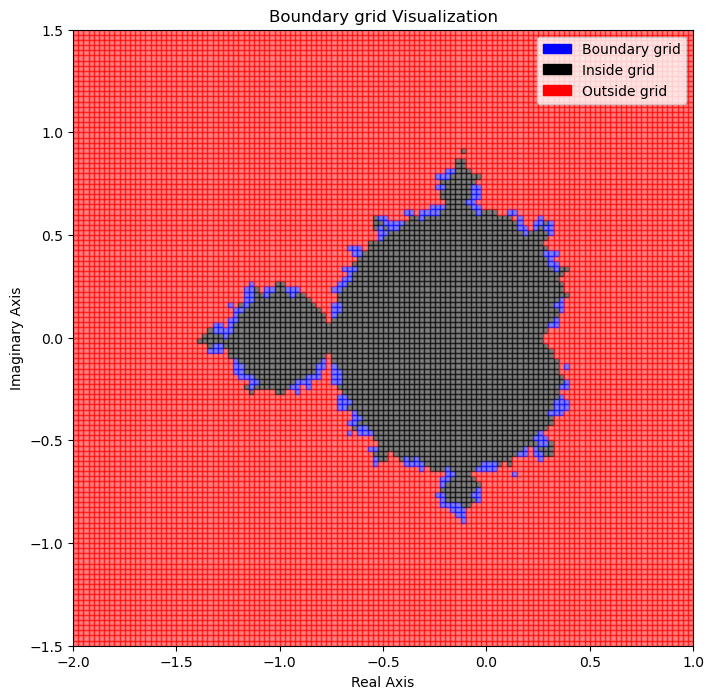

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-2, 1])
ax.set_ylim([-1.5, 1.5])

labels = {'blue': 'Boundary grid', 'black': 'Inside grid', 'red': 'Outside grid'}
# 创建代表图例的矩形
for color, label in labels.items():
    ax.add_patch(patches.Rectangle((0, 0), 0, 0, color=color, label=label))
# 遍历boundary_grid并绘制矩形
for xrange, yrange, iteration in Sampling_area_division:
    if init_threshold <= iteration < max_iter or iteration == -1:
        color = 'blue'  # 在这里定义填充颜色
    elif iteration == max_iter:
        color = 'black'
    else:
        color = 'red'

    # 创建矩形并添加到坐标轴
    rect = patches.Rectangle((xrange[0], yrange[0]), xrange[1] - xrange[0], yrange[1] - yrange[0], color=color,alpha=0.5)
    ax.add_patch(rect)
plt.title('Boundary grid Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
ax.legend()
# 显示图形
plt.show()

#main2

In [18]:
boundary_grid_list = []

# 收集迭代次数在10到1999之间的点，同时记录它们在原始网格中的索引
points_to_check = []
t = 0
for i in range(points_per_side):
    for j in range(points_per_side):
        if init_threshold <= structured_grid['iteration'][j, i] < max_iter:
            t += 1
            points_to_check.append((structured_grid[j, i], i, j))  # 存储点的数据和索引
#print(len(points_to_check))
print(t)
for point, x_index, y_index in points_to_check:
    boundary_grid_list.append(point)  # 加入初始点
print(len(boundary_grid_list))

# 将列表转换为numpy数组
boundary_grid = np.array(boundary_grid_list, dtype=structured_grid.dtype)
#print(len(points_to_check))
# 检查boundary_grid的一部分内容
#print(boundary_grid[:10])  # 展示前10个元素以示例
"""
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 创建一个与初始网格大小相同的图像
visualization_grid = np.zeros((points_per_side, points_per_side))

# 填充图像
for point in simulation_results_array:
    x_range = point['x_range']
    y_range = point['y_range']
    iteration = point['iteration']

    # 计算对应网格中的索引
    x_indices = np.where((x_values >= x_range[0]) & (x_values < x_range[1]))[0]
    y_indices = np.where((y_values >= y_range[0]) & (y_values < y_range[1]))[0]

    for x_index in x_indices:
        for y_index in y_indices:
            visualization_grid[y_index, x_index] = iteration

# 创建一个颜色映射，较高的迭代次数对应较暗的颜色
cmap = plt.cm.viridis
norm = mcolors.PowerNorm(0.3, vmin=visualization_grid.min(), vmax=visualization_grid.max())

# 绘制可视化图像
plt.figure(figsize=(8, 8))
plt.imshow(visualization_grid, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Simulation Results Visualization')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.show()
"""


91
91


"\nimport matplotlib.pyplot as plt\nimport matplotlib.colors as mcolors\n\n# 创建一个与初始网格大小相同的图像\nvisualization_grid = np.zeros((points_per_side, points_per_side))\n\n# 填充图像\nfor point in simulation_results_array:\n    x_range = point['x_range']\n    y_range = point['y_range']\n    iteration = point['iteration']\n\n    # 计算对应网格中的索引\n    x_indices = np.where((x_values >= x_range[0]) & (x_values < x_range[1]))[0]\n    y_indices = np.where((y_values >= y_range[0]) & (y_values < y_range[1]))[0]\n\n    for x_index in x_indices:\n        for y_index in y_indices:\n            visualization_grid[y_index, x_index] = iteration\n\n# 创建一个颜色映射，较高的迭代次数对应较暗的颜色\ncmap = plt.cm.viridis\nnorm = mcolors.PowerNorm(0.3, vmin=visualization_grid.min(), vmax=visualization_grid.max())\n\n# 绘制可视化图像\nplt.figure(figsize=(8, 8))\nplt.imshow(visualization_grid, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])\nplt.colorbar(label='Iteration Count')\nplt.title('Simulation Results Visualization')\nplt.xlabel('Real Axis')

#第二次迭代作图

[([-1.325, -1.3  ], [-0.075, -0.05 ], 654)]


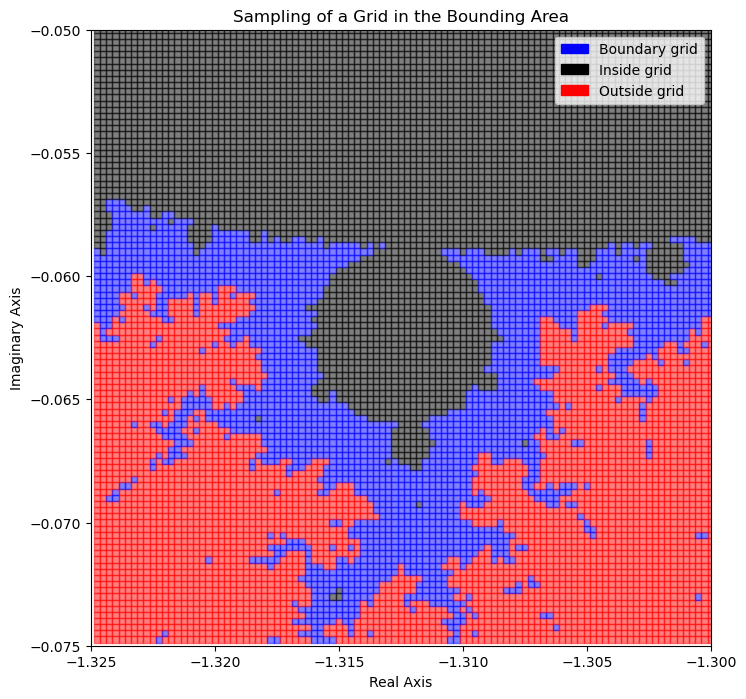

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import viridis  # 使用viridis颜色映射，您可以选择其他的
from matplotlib.colors import Normalize
def create_grid(boundary_grid_list):
    # 定义总模拟次数上限
    total_max_simulations = 10000

    # 计算每个网格的最大模拟次数
    num_points = len(boundary_grid_list)
    max_simulations_per_point = total_max_simulations // num_points

    # 找到不大于max_simulations_per_point的最大平方数
    square_root = int(math.sqrt(max_simulations_per_point))
    max_simulations_per_point_square = square_root ** 2

    # 对每个网格点进行均匀划分和模拟
    simulation_results_structured = []
    for point in boundary_grid_list:
        x_start, x_end = point['x_range']
        y_start, y_end = point['y_range']

        # 计算x和y的步长
        x_step = (x_end - x_start) / square_root
        y_step = (y_end - y_start) / square_root

        # 在每个小区域内进行模拟
        for i in range(square_root):
            for j in range(square_root):
                x = x_start + (i + 0.5) * x_step 
                y = y_start + (j + 0.5) * y_step 
                c = complex(x, y)  # 小区域的中心点
                iteration = mandelbrot(c, max_iter)
                x_range_small = [x, x + x_step]
                y_range_small = [y, y + y_step]
                simulation_results_structured.append((x_range_small, y_range_small, iteration))

    # 转换为numpy数组
    simulation_results_array = np.array(simulation_results_structured, dtype=structured_grid.dtype)
    return simulation_results_array

boundary_grid = [boundary_grid[0]]
print(boundary_grid)
x_range, y_range = boundary_grid[0][0], boundary_grid[0][1]
simulation_result = create_grid(boundary_grid)
fig, ax = plt.subplots(figsize=(8, 8))

labels = {'blue': 'Boundary grid', 'black': 'Inside grid', 'red': 'Outside grid'}
# 创建代表图例的矩形
for color, label in labels.items():
    ax.add_patch(patches.Rectangle((0, 0), 0, 0, color=color, label=label))

ax.set_xlim(x_range)
ax.set_ylim( y_range)

# 遍历boundary_grid并绘制矩形
for xrange, yrange, iteration in simulation_result:
    if init_threshold <= iteration < max_iter:
        color = 'blue'  # 在这里定义填充颜色
    elif iteration == max_iter:
        color = 'black'
    else:
        color = 'red'

    # 创建矩形并添加到坐标轴
    rect = patches.Rectangle((xrange[0], yrange[0]), xrange[1] - xrange[0], yrange[1] - yrange[0], color=color,alpha=0.5)
    ax.add_patch(rect)

plt.title('Sampling of a Grid in the Bounding Area')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
# 显示图形
ax.legend(loc='upper right')
plt.show()









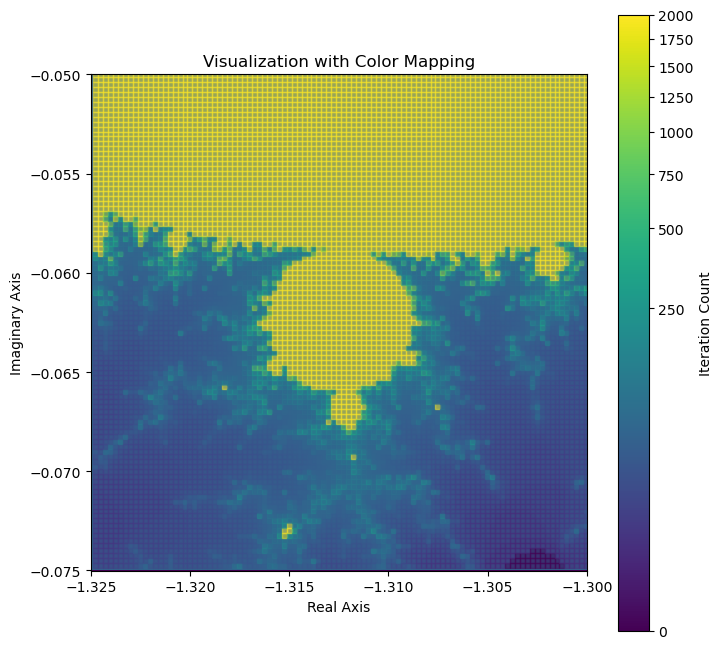

In [38]:
x_range, y_range = boundary_grid[0][0], boundary_grid[0][1]
simulation_result = create_grid(boundary_grid)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(x_range)
ax.set_ylim(y_range)

iteration_data = [iteration for _, _, iteration in simulation_result]
# 创建颜色映射的规范化对象
norm = mcolors.PowerNorm(0.3, vmin=min(iteration_data), vmax=max_iter)

# 遍历boundary_grid并绘制矩形
for xrange, yrange, iteration in simulation_result:
    if 0 <= iteration <= max_iter:
        # 根据迭代次数计算颜色
        color = viridis(norm(iteration))
        
    # 创建矩形并添加到坐标轴
    rect = patches.Rectangle((xrange[0], yrange[0]), xrange[1] - xrange[0], yrange[1] - yrange[0], color=color, alpha=0.5)
    ax.add_patch(rect)

# 添加颜色条
iteration_data = structured_grid['iteration']
plt.imshow(iteration_data, cmap=cmap, norm=norm, extent=[-2, 1, -1.5, 1.5])
plt.colorbar(label='Iteration Count')
plt.title('Visualization with Color Mapping')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
# 显示图形
plt.show()

main3

In [208]:
for i in range(1,2):
    #print(bound_area)
    #print(len(boundary_grid))
    simulation_result = create_grid(boundary_grid,sample_size)
    total_grid = len(simulation_result)
    #print(len(simulation_result))
    out_grid, boundary_grid, in_grid = select_boundary_grid(simulation_result,init_threshold,max_iter)
    print(f"area:{bound_area},{len(in_grid) / len(simulation_result) * bound_area},{len(boundary_grid) / len(simulation_result) * bound_area},{len(out_grid) / len(simulation_result) * bound_area}")
        
    in_area += len(in_grid) / len(simulation_result) * bound_area
    out_area += len(out_grid) / len(simulation_result) * bound_area
    bound_area = len(boundary_grid) / len(simulation_result) * bound_area
    #print(len(boundary_grid))
    print(f"in_area = {in_area}")
    print(f"out_area = {out_area}")
    print(f"bound_area = {bound_area}")

print(f"mandelbrot set {in_area + bound_area * in_area / (in_area + out_area)}")

area:0.156825,0.08994948979591837,0.034539795918367346,0.03233571428571429
in_area = 1.5047494897959182
out_area = 7.460710714285714
bound_area = 0.034539795918367346
mandelbrot set 1.510546597708143


results:max_sample_points_eachround = sample_size ^ 2
sample_size = 100, mandelbrot set = 1.5074953959370494 compute time = 1.2s
sample_size = 110, mandelbrot set = 1.5074241964142039 compute time = 1.6s
sample_size = 120, mandelbrot set = 1.5097123734708056 compute time = 3.1s
sample_size = 130, mandelbrot set = 1.5043740720050014 compute time = 2.7s
sample_size = 140, mandelbrot set = 1.511680738226725  compute time = 3.2s
sample_size = 150, mandelbrot set = 1.5099042272760177 compute time = 4.7s
sample_size = 160, mandelbrot set = 1.5111421486394867 compute time = 4.9s
sample_size = 170, mandelbrot set = 1.5124911716524527 compute time = 6.3s
sample_size = 180, mandelbrot set = 1.5135754416120348 compute time = 6.5s
sample_size = 190, mandelbrot set = 1.5139774899562628 compute time = 8.0s
sample_size = 200, mandelbrot set = 1.513917324460838  compute time = 9.5s

In [209]:
cubes = [1.2 * round(x**3, 2) for x in np.arange(1.1, 2.0, 0.1)]
print(cubes)

[1.596, 2.076, 2.64, 3.2880000000000003, 4.056, 4.919999999999999, 5.892, 6.9959999999999996, 8.232]


test

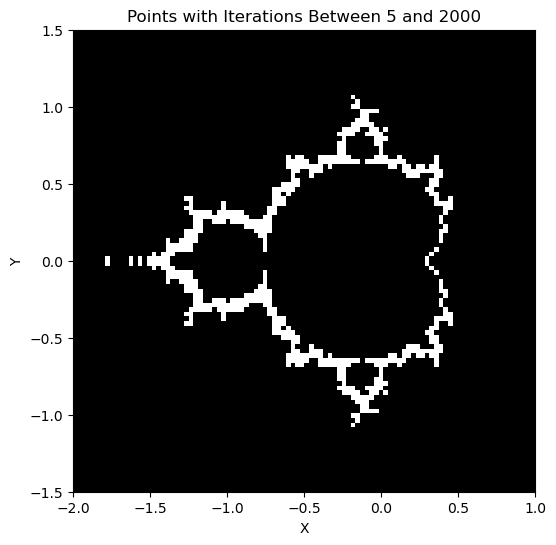

In [51]:
# 创建一个新的网格来可视化迭代次数在5到2000之间的点
visualization_grid = np.where((grid >= 10) & (grid < 2000), 1, 0)

# 使用Matplotlib绘制可视化图
plt.figure(figsize=(8, 6))
plt.imshow(visualization_grid, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='gray', origin='lower')
plt.title('Points with Iterations Between 5 and 2000')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


测试函数

In [179]:
def create_grid(boundary_grid_list,sample_size):
    # 定义总模拟次数上限
    total_max_simulations = np.square(sample_size) * 5

    # 计算每个网格的最大模拟次数
    num_points = len(boundary_grid_list)
    max_simulations_per_point = total_max_simulations // num_points

    # 找到不大于max_simulations_per_point的最大平方数
    square_root = int(math.sqrt(max_simulations_per_point))
    max_simulations_per_point_square = square_root ** 2

    # 对每个网格点进行均匀划分和模拟
    simulation_results_structured = []
    for point in boundary_grid_list:
        thisgrid = np.zeros((square_root, square_root))
        x_start, x_end = point['x_range']
        y_start, y_end = point['y_range']

        # 计算x和y的步长
        x_step = (x_end - x_start) / square_root
        y_step = (y_end - y_start) / square_root

        # 在每个小区域内进行模拟
        for i in range(square_root):
            for j in range(square_root):
                x = x_start + (i + 0.5) * x_step 
                y = y_start + (j + 0.5) * y_step 
                c = complex(x, y)  # 小区域的中心点
                iteration = mandelbrot(c, max_iter)
                x_range_small = [x, x + x_step]
                y_range_small = [y, y + y_step]
                thisgrid[i][j] = iteration
        update_grid(thisgrid)
        for i in range(square_root):
            for j in range(square_root):
                x = x_start + (i + 0.5) * x_step 
                y = y_start + (j + 0.5) * y_step 
                c = complex(x, y)  # 小区域的中心点
                iteration = thisgrid[i][j]
                x_range_small = [x, x + x_step]
                y_range_small = [y, y + y_step]        
                simulation_results_structured.append((x_range_small, y_range_small, iteration))

    # 转换为numpy数组
    simulation_results_array = np.array(simulation_results_structured, dtype=structured_grid.dtype)
    return simulation_results_array

def update_grid(thisgrid):
    rows, cols = thisgrid.shape
    for i in range(rows):
        for j in range(cols):
            if thisgrid[i][j] == 2000:
                # 检查上下左右四个方向
                neighbors = []
                if i > 0: neighbors.append(thisgrid[i-1][j])  # 上
                if i < rows-1: neighbors.append(thisgrid[i+1][j])  # 下
                if j > 0: neighbors.append(thisgrid[i][j-1])  # 左
                if j < cols-1: neighbors.append(thisgrid[i][j+1])  # 右

                # 检查是否有邻居的值在50到1999之间
                if any(50 <= neighbor <= 1999 for neighbor in neighbors):
                    thisgrid[i][j] = -1
    for i in range(rows):
        for j in range(cols):
            if thisgrid[i][j] == -1:
                thisgrid[i][j] = 100
def select_boundary_grid(simulation_results_array,iteration_threshold,max_iter):

    # 根据迭代次数条件筛选元素
    array_0_to_iteration_threshold = simulation_results_array[simulation_results_array['iteration'] < iteration_threshold]
    array_iteration_threshold_to_1999 = simulation_results_array[(simulation_results_array['iteration'] >= iteration_threshold) & 
                                            (simulation_results_array['iteration'] < max_iter)]
    array_2000 = simulation_results_array[simulation_results_array['iteration'] == max_iter]

    return array_0_to_iteration_threshold, array_iteration_threshold_to_1999, array_2000

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter


可视化

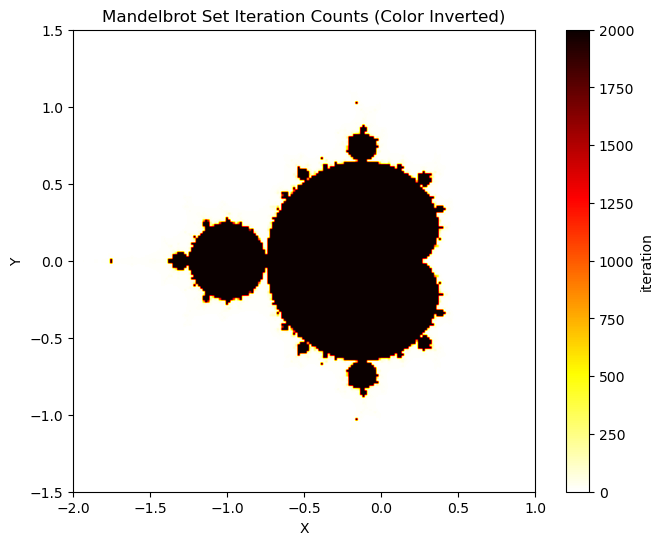

In [26]:
import matplotlib.pyplot as plt

# 将结果转换为NumPy数组以便处理
results_array = np.array(results)

# 提取X, Y坐标和迭代次数
X = results_array[:, 0]
Y = results_array[:, 1]
iterations = results_array[:, 2]

# 创建一个网格来绘制热图
X_grid, Y_grid = np.meshgrid(x_values, y_values)
iteration_grid = iterations.reshape(points_per_side, points_per_side)

# 使用反向的热图colormap
plt.figure(figsize=(8, 6))
plt.imshow(iteration_grid.T, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='hot_r', origin='lower')
plt.colorbar(label='iteration')
plt.title('Mandelbrot Set Iteration Counts (Color Inverted)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


迭代细化

In [53]:
# 定义一个函数来计算一个区域内所有点的迭代次数
def compute_grid(x_range, y_range, points_per_side, max_iter):
    x_values = np.linspace(x_range[0], x_range[1], points_per_side)
    y_values = np.linspace(y_range[0], y_range[1], points_per_side)
    grid = np.zeros((points_per_side, points_per_side), dtype=np.int)

    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            c = complex(x, y)
            iteration = mandelbrot(c, max_iter)
            grid[j, i] = iteration
    return grid, x_values, y_values

# 初始参数
sample_size = 200
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 计算初始网格
initial_grid, initial_x_values, initial_y_values = compute_grid(x_range, y_range, sample_size, max_iter)

# 选择需要细化的区域，例如迭代次数在某个范围内的区域
refinement_threshold = (5, 200)
refinement_mask = (initial_grid >= refinement_threshold[0]) & (initial_grid <= refinement_threshold[1])

# 这只是一个示例，选择第一个需要细化的点来演示
refinement_points = np.argwhere(refinement_mask)
if len(refinement_points) > 0:
    first_point = refinement_points[0]
    x_refine_range = [initial_x_values[first_point[1]] - 0.1, initial_x_values[first_point[1]] + 0.1]
    y_refine_range = [initial_y_values[first_point[0]] - 0.1, initial_y_values[first_point[0]] + 0.1]

    # 对选定区域进行细化计算
    refined_grid, _, _ = compute_grid(x_refine_range, y_refine_range, sample_size, max_iter)

    # 展示细化后的网格的一小部分
    refined_grid[:5, :5]
else:
    "No points found for refinement"

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

使用类

In [54]:
class MandelbrotGrid:
    def __init__(self, x_range, y_range, resolution, max_iter):
        self.x_range = x_range
        self.y_range = y_range
        self.resolution = resolution
        self.max_iter = max_iter
        self.grid = self._compute_grid()

    def _compute_grid(self):
        x_values = np.linspace(self.x_range[0], self.x_range[1], self.resolution)
        y_values = np.linspace(self.y_range[0], self.y_range[1], self.resolution)
        grid = np.zeros((self.resolution, self.resolution), dtype=np.int32)

        for i, x in enumerate(x_values):
            for j, y in enumerate(y_values):
                c = complex(x, y)
                iteration = mandelbrot(c, self.max_iter)
                grid[j, i] = iteration
        return grid

# 使用新的类来创建初始网格
sample_size = 200
max_iter = 2000
x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建MandelbrotGrid对象
initial_grid_obj = MandelbrotGrid(x_range, y_range, sample_size, max_iter)

# 展示部分网格数据（前5x5区域）
initial_grid_obj.grid[:5, :5]


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])